In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Matriz página 6

In [2]:
def conduc1d(k,L,TA,TB): #S se considera 0 al menos que sea dicho lo contrario
    n=21
    w=int(2.5*np.pi)
    S=0
    #Las variables físicas se piden, por lo que únicamente se calculan las matemáticas
    h = L/(n+1)
    r = k/h**2
    
    #Se crea la matriz T (que contendrá el resultado), b y A (que son el sistema a resolver)
    T = np.zeros(n+2)
    b = np.zeros(n) 
    A = np.zeros((n,n))
    
    b[:] = S/r #La totalidad de la matriz toma el valor S/r
    T[0] = TA #La primer celda de T toma uno de los valores de frontera
    T[-1] = TB #Toma el segundo valor de frontera
    b[0] += TA #Se suma el primer valor de frontera en el primer espacio
    b[-1] += TB #Se suma el segundo valor de frontera en el último espacio
    for i in range (0,n): #Pone el valor 2-w^2/r en la diagonal principal
        A[i,i]= 2-w**2/r 
        for j in range(0,n-1): #Pone el valor -1 a las diagonales aledañas a la principal
            A[j,j+1]=-1
            A[j+1,j]=-1

    T[1:n+1] = np.linalg.solve(A,b) #Resuelve el sistema de ecuaciones
    return T


In [3]:
conduc1d(1,1,1,1)

array([ 1.        ,  1.0724288 ,  1.03628526,  0.89522854,  0.66353919,
        0.36467334,  0.02888809, -0.30982179, -0.61716541, -0.8620274 ,
       -1.01961803, -1.07398287, -1.01961803, -0.8620274 , -0.61716541,
       -0.30982179,  0.02888809,  0.36467334,  0.66353919,  0.89522854,
        1.03628526,  1.0724288 ,  1.        ])

## Ejercicio página 9

In [4]:
def solExact (x, w):
    return ((1.0-np.cos(w))/np.sin(w))*np.sin(w*x)+np.cos(w*x)

In [5]:
#Error = np.linalg.norm(solExact(x, w)-T,2) 

In [6]:
#Usando el código anterior
def conduc1de(k,L,TA,TB):
    n=21
    w=int(2.5*np.pi)
    S=0

    h = L/(n+1)
    r = k/h**2
    
    T = np.zeros(n+2)
    b = np.zeros(n) 
    A = np.zeros((n,n))
    
    b[:] = S/r
    T[0] = TA
    T[-1] = TB
    b[0] += TA 
    b[-1] += TB 
    for i in range (0,n):
        A[i,i]= 2-w**2/r 
        for j in range(0,n-1):
            A[j,j+1]=-1
            A[j+1,j]=-1

    T[1:n+1] = np.linalg.solve(A,b)
    
    #x = [h * i for i in range(1, n+1)] #Calculando el valor de X
    #x.insert(0,0)
    #x.append(L)
    x=np.linspace(0,L,n+2)
    
    Error = np.linalg.norm(solExact(x, w)-T, 2) #Añadiendo el error

    #Características estéticas de la gráfica
    titulo = 'Ecuación : $\partial^2 u(x)/\partial x^2 = \omega^2 u(x); \,\,\, u(a) = u(b) = 1$'
    numerica = 'Sol. Numérica : $E(h = %g) = %g$' % (h, Error)
    exacta = 'Sol. Analítica : $u(x) = \\frac{1 - \cos(\omega)}{\sin(\omega)} \sin(\omega x) + \cos(\omega x)$'
    
    sol = np.linspace(0,1,100)
    plt.plot(sol, solExact(sol,w),'r-', label=exacta)
    plt.scatter(x, T, edgecolor='k', zorder= 10, label=numerica)
    plt.title(titulo)
    plt.xlabel('$x$')
    plt.ylabel('$T$')
    plt.ylim(-1.5,1.5)
    plt.legend(loc='upper center')
    plt.grid()
    plt.show()

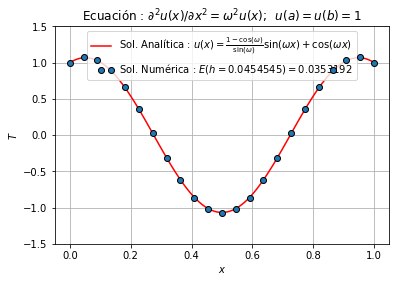

In [7]:
conduc1de(1,1,1,1)

## Ejercicio 1.3
#### Calcular el coeficiente de aproximación de $D_{3}f(x)=Af_{i+1}+Bf_{i}+Cf_{i-1}+Df_{i-2}$

##### Usando series de Taylor
$f_{i+1}=f_{i}+h^{'}_{i}+\frac{h^{2}}{2!}f^{''}_{i}+\frac{h^{3}}{3!}f^{'''}_{i}+O(h^{4})$

$f_{i-1}=f_{i}-h^{'}_{i}+\frac{h^{2}}{2!}f^{''}_{i}-\frac{h^{3}}{3!}f^{'''}_{i}+O(h^{4})$

$f_{i-2}=f_{i}-2h^{'}_{i}+\frac{2h^{2}}{2!}f^{''}_{i}-\frac{2h^{3}}{3!}f^{'''}_{i}+O(h^{4})$

##### Sustituyendo en $D_{3}f(x)$

$D_{3}f(x)=A(f_{i}+h^{'}_{i}+\frac{h^{2}}{2!}f^{''}_{i}+\frac{h^{3}}{3!}f^{'''}_{i}+O(h^{4}))+Bf_{i}+C(f_{i}-h^{'}_{i}+\frac{h^{2}}{2!}f^{''}_{i}-\frac{h^{3}}{3!}f^{'''}_{i}+O(h^{4}))+D(f_{i}-2h^{'}_{i}+\frac{2h^{2}}{2!}f^{''}_{i}-\frac{2h^{3}}{3!}f^{'''}_{i}+O(h^{4}))$

##### Resolviendo el sistema de ecuaciones como una matriz

$\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & 0 & -1 & -2  \\
\frac{1}{2} & 0 & \frac{1}{2} & 2 \\
\frac{1}{6} & 0 & \frac{-1}{6} & \frac{-4}{3} 
\end{bmatrix}$
$\begin{bmatrix}
A\\
B\\
C\\
D
\end{bmatrix}$
$=$
$\begin{bmatrix}
0\\
\frac{1}{h}\\
0\\
0
\end{bmatrix}$

##### Resolviendo y sustituyendo tenemos:

$\frac{1}{6}(2f_{i+1}+3f_{i}-6f_{i-1}+f_{1-2})$

## Ejercicio 1.4

### El repositorio de referencia no se encontró :((